In [1]:
# Load all the libraries and packages and output which version is being loaded
import scipy
print('scipy: {}'.format(scipy.__version__)) # numpy
import numpy as np
print('numpy: {}'.format(np.__version__))
# matplotlib
import matplotlib 
import matplotlib.pyplot as plt
print('matplotlib: {}'.format(matplotlib.__version__)) # pandas
import pandas as pd
print('pandas: {}'.format(pd.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

import datetime
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
#import ml_metrics as metrics
from sklearn.metrics import classification_report
import seaborn as sns
import warnings
#warnings.filterwarnings('ignore')
%matplotlib inline

scipy: 0.18.1
numpy: 1.11.3
matplotlib: 2.0.0
pandas: 0.19.2
sklearn: 0.18.1


/Users/zohaib/anaconda/envs/py27_ds_dt_13/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [61]:
!head -n2 datasets/claims-2002-2006_0.xls

PK     ! 71���  �   [Content_Types].xml �(�                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 �TKo�0�O��r����4Q8�qܐ`? 4�F�I�~nxhC@��ҨI�=۽����%4�梛uD�p��Y.���H��ժrr����]o���	G[�EI�_�Ģ�Za�<X>��P+��0�^s5���<��YK)5��{��ZT���x{�db�H^7��\(�+S(b�ri�I�SS�vŢf�} �����|0�F@��Pȣ�*��t�*��(K�񁭟`hNN���}�s�!�@��f�rU�����y�KSS���؝�3��2ʸto,���[t����^B�i!DZW�7v�mc.U ="������n�Aj��q�>��[3����瑧F��_aעMt��7�b�3�ȹ��`A3�4�#�2���/   �� PK     ! �U0#�   L   _rels/.rels �(�                     

In [2]:
df1 = pd.read_excel('datasets/claims-2002-2006_0.xls')
df1.head(2)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,2002-01-04 00:00:00,2002-12-12 00:00:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.0,Approved,350.0,Approve in Full
1,0202417M,2002-02-02 00:00:00,2004-01-16 00:00:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),100.0,Settled,50.0,Settle


In [3]:
df2 = pd.read_excel('datasets/claims-2007-2009_0.xls')
df2.head(2)

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,2007010518383,2007-01-01,2006-11-25 00:00:00,PHX,Phoenix Sky Harbor International,Southwest Airlines,Passenger Property Loss,Checked Baggage,Automobile Parts; Other,319.73,Denied,0.0,Deny
1,2007020620282,2007-01-02,2007-01-02 00:00:00,RDU,Raleigh-Durham International,Delta Air Lines,Passenger Property Loss,Checkpoint,Watches - Expensive more than $100,1995.00,Denied,0.0,Deny


In [4]:
# UDF for adding underscore between column_names of two words or more
def addUnderscore(current_columns):
    new_columns = []
    for item in current_columns:
        segments = item.split()
        new_columns.append('_'.join(segments))
    return new_columns

In [5]:
# Replace black space in columns names with underscore
df1.rename(columns=dict(zip(df1.columns.tolist(),addUnderscore(df1.columns.tolist()))), inplace=True)
df2.rename(columns=dict(zip(df2.columns.tolist(),addUnderscore(df2.columns.tolist()))), inplace=True)

In [6]:
df1.head()

,Claim_Number,Date_Received,Incident_Date,Airport_Code,Airport_Name,Airline_Name,Claim_Type,Claim_Site,Item,Claim_Amount,Status,Close_Amount,Disposition
0,0909802M,2002-01-04 00:00:00,2002-12-12 00:00:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00,Approve in Full
1,0202417M,2002-02-02 00:00:00,2004-01-16 00:00:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),100.00,Settled,50.00,Settle
2,0202445M,2002-02-04 00:00:00,2003-11-26 00:00:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92,Settle
3,0909816M,2002-02-07 00:00:00,2003-01-06 00:00:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full
4,2005032379513,2002-02-18 00:00:00,2005-02-05 00:00:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,"Baby - Strollers, car seats, playpen, etc.",84.79,Approved,84.79,Approve in Full


In [7]:
df2.head()

,Claim_Number,Date_Received,Incident_Date,Airport_Code,Airport_Name,Airline_Name,Claim_Type,Claim_Site,Item,Claim_Amount,Status,Close_Amount,Disposition
0,2007010518383,2007-01-01,2006-11-25 00:00:00,PHX,Phoenix Sky Harbor International,Southwest Airlines,Passenger Property Loss,Checked Baggage,Automobile Parts; Other,319.73,Denied,0.0,Deny
1,2007020620282,2007-01-02,2007-01-02 00:00:00,RDU,Raleigh-Durham International,Delta Air Lines,Passenger Property Loss,Checkpoint,Watches - Expensive more than $100,1995.00,Denied,0.0,Deny
2,2007020620284,2007-01-02,2006-12-05 00:00:00,BOS,Boston (Logan) International Airport,Jet Blue,Passenger Property Loss,Checked Baggage,Computer - Laptop,850.00,Denied,0.0,Deny
3,2008010937576,2007-01-02,2007-12-04 00:00:00,SJC,Norman Y Mineta San Jose International,Continental Airlines,Passenger Property Loss,Checked Baggage,Eyeglasses - (including contact lenses),350.00,Denied,0.0,Deny
4,2008010437392,2007-01-02,2007-12-22 00:00:00,LAS,McCarran International,Alaska Airlines,Property Damage,Checked Baggage,Luggage (all types including footlockers),NaN,"Insufficient, one of the following items requi...",NaN,NaN


In [12]:
# Check to make sure both dataframe have the same columns
df2.columns.difference(df1.columns)

Index([], dtype='object')

In [13]:
df1.shape

(97231, 13)

In [15]:
# Combine both df1 and df2 into one dataframe df12
df12 = pd.concat([df1,df2])
df12.reset_index(drop=True, inplace=True)
df12.index

RangeIndex(start=0, stop=145143, step=1)

In [16]:
df12.shape

(145143, 13)

## Drop Rows Missing Target Variable

In [17]:
df12.Disposition.value_counts(dropna=False)

Deny               68382
Approve in Full    35010
Settle             27967
NaN                13784
Name: Disposition, dtype: int64

In [18]:
df12.drop(df12[df12.Disposition.isnull()].index).Disposition.value_counts()

Deny               68382
Approve in Full    35010
Settle             27967
Name: Disposition, dtype: int64

In [19]:
df12 = df12.drop(df12[df12.Disposition.isnull()].index)

In [20]:
df12.Disposition.value_counts()

Deny               68382
Approve in Full    35010
Settle             27967
Name: Disposition, dtype: int64

In [21]:
df12.Disposition.value_counts(normalize=True)

Deny               0.520573
Approve in Full    0.266522
Settle             0.212905
Name: Disposition, dtype: float64

In [22]:
df12.shape

(131359, 13)

In [23]:
df12.isnull().sum()

Claim_Number         0
Date_Received      119
Incident_Date      771
Airport_Code      4181
Airport_Name      4181
Airline_Name     28310
Claim_Type        5887
Claim_Site         277
Item              2893
Claim_Amount       766
Status               0
Close_Amount      1473
Disposition          0
dtype: int64

## Review Record Missing Airline_Name

Review pattern of records missing airline_name to see if there's a trend that could help fill in those values. And whether most of these records are only missing Airline_Name

In [24]:
df_missing_airline = df12[df12.Airline_Name.isnull()]
df_missing_airline.isnull().sum()

Claim_Number         0
Date_Received       42
Incident_Date      632
Airport_Code      2642
Airport_Name      2642
Airline_Name     28310
Claim_Type        2390
Claim_Site         109
Item               498
Claim_Amount       571
Status               0
Close_Amount       566
Disposition          0
dtype: int64

In [25]:
df_missing_airline.groupby('Disposition').Claim_Amount.describe()\
                    .unstack()\
                    .reindex(index = ['Approve in Full','Settle','Deny'])

,count,mean,std,min,25%,50%,75%,max
Disposition,,,,,,,,
Approve in Full,9670.0,1.546760e+02,3.899540e+02,0.0,30.000,62.495,146.975,1.167223e+04
Settle,7329.0,9.678612e+02,2.493934e+04,0.0,100.000,199.980,400.000,2.000000e+06
Deny,10740.0,2.800338e+08,2.894808e+10,0.0,94.255,229.855,625.000,3.000000e+12


Disposition
Approve in Full    Axes(0.125,0.125;0.775x0.755)
Deny               Axes(0.125,0.125;0.775x0.755)
Settle             Axes(0.125,0.125;0.775x0.755)
Name: Claim_Amount, dtype: object

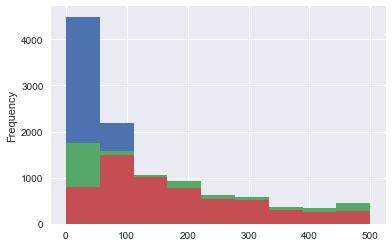

In [26]:
df_missing_airline.groupby('Disposition').Claim_Amount.plot(kind='hist',bins=np.linspace(0,500,10))

In [27]:
df_missing_airline.Airport_Code.value_counts().head()

LAX    1560
ORD     952
MIA     849
EWR     820
JFK     820
Name: Airport_Code, dtype: int64

In [28]:
df_missing_airline.Claim_Type.value_counts()

Property Damage            13622
Passenger Property Loss    11807
Personal Injury              196
Motor Vehicle                129
Employee Loss (MPCECA)        89
Passenger Theft               77
Name: Claim_Type, dtype: int64

In [29]:
df_missing_airline.Claim_Site.value_counts()

Checked Baggage    18917
Checkpoint          8237
Other                883
Motor Vehicle        163
Bus Station            1
Name: Claim_Site, dtype: int64

In [30]:
df_missing_airline.Item.value_counts().reset_index()

,index,Item
0,Other,7616
1,Luggage (all types including footlockers),4866
2,"Clothing - Shoes, belts, accessories, etc.",3268
3,Jewelry - Fine,1977
4,Locks,1718
5,Cameras - Digital,1615
6,Computer - Laptop,1574
7,Eyeglasses - (including contact lenses),1108
8,"Cosmetics - Perfume, toilet articles, medicine...",611
9,Cell Phones,560


In [33]:
df_missing_airline.count()

Claim_Number     28310
Date_Received    28268
Incident_Date    27678
Airport_Code     25668
Airport_Name     25668
Airline_Name         0
Claim_Type       25920
Claim_Site       28201
Item             27812
Claim_Amount     27739
Status           28310
Close_Amount     27744
Disposition      28310
dtype: int64

## Drop All Rows Missing Any Features

In [35]:
df12_final = df12.dropna()
df12_final.shape

(94848, 13)

In [36]:
df12_final.dtypes

Claim_Number      object
Date_Received     object
Incident_Date     object
Airport_Code      object
Airport_Name      object
Airline_Name      object
Claim_Type        object
Claim_Site        object
Item              object
Claim_Amount     float64
Status            object
Close_Amount     float64
Disposition       object
dtype: object

In [37]:
df12_final.head(2)

,Claim_Number,Date_Received,Incident_Date,Airport_Code,Airport_Name,Airline_Name,Claim_Type,Claim_Site,Item,Claim_Amount,Status,Close_Amount,Disposition
0,0909802M,2002-01-04 00:00:00,2002-12-12 00:00:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00,Approve in Full
2,0202445M,2002-02-04 00:00:00,2003-11-26 00:00:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92,Settle


In [47]:
df12_final['Date_Received'] = pd.to_datetime(df12_final.Date_Received)

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 2500-02-18 00:00:00

In [48]:
df12_final[df12_final.Date_Received >= datetime.datetime(year=2010,month=1,day=1)].count()

Claim_Number     22
Date_Received    22
Incident_Date    22
Airport_Code     22
Airport_Name     22
Airline_Name     22
Claim_Type       22
Claim_Site       22
Item             22
Claim_Amount     22
Status           22
Close_Amount     22
Disposition      22
dtype: int64

In [51]:
df12_final[df12_final.Date_Received >= datetime.datetime(2010,1,1,0,0)].sort_values('Date_Received',ascending=False)

,Claim_Number,Date_Received,Incident_Date,Airport_Code,Airport_Name,Airline_Name,Claim_Type,Claim_Site,Item,Claim_Amount,Status,Close_Amount,Disposition


In [49]:
df12_final=df12_final.drop(df12_final[df12_final.Date_Received >= datetime.datetime(year=2010,month=1,day=1)].index)

In [50]:
df12_final[df12_final.Date_Received >= datetime.datetime(year=2010,month=1,day=1)].count()

Claim_Number     0
Date_Received    0
Incident_Date    0
Airport_Code     0
Airport_Name     0
Airline_Name     0
Claim_Type       0
Claim_Site       0
Item             0
Claim_Amount     0
Status           0
Close_Amount     0
Disposition      0
dtype: int64

In [52]:
df12_final['Incident_Date'] = pd.to_datetime(df12_final.Incident_Date)

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 201-03-17 00:00:00

In [85]:
df12_final[df12_final.Incident_Date.astype(str).str[:4].str.contains('-')].count()

Claim_Number     118
Date_Received    118
Incident_Date    118
Airport_Code     118
Airport_Name     118
Airline_Name     118
Claim_Type       118
Claim_Site       118
Item             118
Claim_Amount     118
Status           118
Close_Amount     118
Disposition      118
dtype: int64

In [86]:
df12_final[df12_final.Incident_Date.astype(str).str[:4].str.contains('-')].Incident_Date.head()

54198    17-MAR-0201 00:00
55085    20-JUN-0209 00:00
55218    09-DEC-0200 00:00
55887    23-DEC-0204 00:00
56041    25-JAN-0201 00:00
Name: Incident_Date, dtype: object

In [88]:
df12_final=df12_final.drop(df12_final[df12_final.Incident_Date.astype(str).str[:4].str.contains('-')].index)

In [89]:
df12_final[df12_final.Incident_Date.astype(str).str[:4].str.contains('-')].count()

Claim_Number     0
Date_Received    0
Incident_Date    0
Airport_Code     0
Airport_Name     0
Airline_Name     0
Claim_Type       0
Claim_Site       0
Item             0
Claim_Amount     0
Status           0
Close_Amount     0
Disposition      0
dtype: int64

In [90]:
df12_final['Date_Received'] = pd.to_datetime(df12_final.Date_Received)
df12_final['Incident_Date'] = pd.to_datetime(df12_final.Incident_Date)

In [91]:
df12_final.dtypes

Claim_Number             object
Date_Received    datetime64[ns]
Incident_Date    datetime64[ns]
Airport_Code             object
Airport_Name             object
Airline_Name             object
Claim_Type               object
Claim_Site               object
Item                     object
Claim_Amount            float64
Status                   object
Close_Amount            float64
Disposition              object
dtype: object

In [93]:
df12_final.count()

Claim_Number     94708
Date_Received    94708
Incident_Date    94708
Airport_Code     94708
Airport_Name     94708
Airline_Name     94708
Claim_Type       94708
Claim_Site       94708
Item             94708
Claim_Amount     94708
Status           94708
Close_Amount     94708
Disposition      94708
dtype: int64

In [97]:
df12_final['Days_Since_Incident'] = df12_final['Date_Received'] - df12_final['Incident_Date']

In [100]:
df12_final.Days_Since_Incident.dtype

dtype('<m8[ns]')

In [ ]:
df12_final.Disposition.value_counts(normalize=True)

In [ ]:
df12_final['Disposition'] = df12_final['Disposition'].astype('category')

In [ ]:
df12_final.dtypes

In [ ]:
df12_final['Disposition_Code'] = df12_final.Disposition.cat.codes
df12_final.dtypes

In [ ]:
df12_final.groupby('Disposition').Disposition_Code.mean()

In [ ]:
df12_final.count()

In [ ]:
df12_final.Item.value_counts().reset_index().Item.head(30).sum()

In [ ]:
top30_items = df12_final.Item.value_counts().head(30).index.tolist()
top30_items

In [ ]:
df12_final[df12_final.Item.str.contains(';')]['Item'].value_counts().reset_index()

In [ ]:
df12_final[(~df12_final.Item.isin(top30_items)) & (~df12_final.Item.str.contains(';'))]\
                    .Item.value_counts().head(20).index.tolist()

## Limit To Records Belonging to Top 30 Item Categories

In [ ]:
df12_final = df12_final[df12_final.Item.isin(top30_items)]

In [ ]:
len(top30_items)

In [ ]:
df12_final.Item.value_counts().count()

In [ ]:
airport_values = df12_final.Airport_Code.value_counts()
airport_values[airport_values > 9].count()

In [92]:
df12_final.head()

,Claim_Number,Date_Received,Incident_Date,Airport_Code,Airport_Name,Airline_Name,Claim_Type,Claim_Site,Item,Claim_Amount,Status,Close_Amount,Disposition
0,0909802M,2002-01-04 00:00:00,2002-12-12 00:00:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00,Approve in Full
2,0202445M,2002-02-04 00:00:00,2003-11-26 00:00:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92,Settle
3,0909816M,2002-02-07 00:00:00,2003-01-06 00:00:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full
4,2005032379513,2002-02-18 00:00:00,2005-02-05 00:00:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,"Baby - Strollers, car seats, playpen, etc.",84.79,Approved,84.79,Approve in Full
5,2005032479636,2002-02-18 00:00:00,2005-02-17 00:00:00,CAK,Akron-Canton Regional,Air Tran Airlines(do not use),Passenger Property Loss,Checked Baggage,Other,459.01,Settled,227.00,Settle
